In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import colorcet as cc
import pathlib

import matplotlib as mpl
import matplotlib.pyplot as plt

import os

import netCDF4

In [2]:
projectname = 'EUREC4A_organization'
workdir = os.getcwd()
rootdir = os.path.dirname(workdir)
while os.path.basename(rootdir) != projectname:
    rootdir = os.path.dirname(rootdir)
repodir = rootdir
figdir = os.path.join(repodir,'figures','idealized_calculations')
scriptsubdir = 'gas_optics'

os.makedirs(os.path.join(figdir,scriptsubdir),exist_ok=True)

In [3]:
dataDir = pathlib.Path("/Users/bfildier/Data/radiation/gas_optics_ckdmip/")
h2o_base   = 'ckdmip_idealized_lw_spectra_h2o_constant'

h2o_nocont = h2o_base.replace("h2o_constant", "h2o-no-continuum_constant") 


In [4]:
# These are the base-10 logarithms of the a-l water vapor files 
np.linspace(-7, -1.5, num=12) 
# Here's a way to iterate through the letters a-l
[chr(i) for i in range(ord('a'), ord('l')+1)]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

In [5]:
wv_key = 'k'# 10^-7 kg/kg; log 10 values are np.linspace(-7, -1.5, num=12)

hdf5file = os.path.join(dataDir,'{}-{}.h5'.format(h2o_base,   wv_key))
h2o_data_base = xr.open_dataset(hdf5file, engine='h5netcdf')

hdf5file_nocont = os.path.join(dataDir,'{}-{}.h5'.format(h2o_nocont,   wv_key))
h2o_data_nocont = xr.open_dataset(hdf5file_nocont, engine='h5netcdf')

In [6]:
data = h2o_data_base
data

<xarray.Dataset>
Dimensions:                          (level: 53, half_level: 54, column: 6, wavenumber: 7211999)
Coordinates:
  * level                            (level) int16 1 2 3 4 5 ... 49 50 51 52 53
  * half_level                       (half_level) int16 1 2 3 4 ... 51 52 53 54
  * wavenumber                       (wavenumber) float64 0.0002 ... 3.26e+03
Dimensions without coordinates: column
Data variables:
    pressure_hl                      (column, half_level) float32 ...
    temperature_hl                   (column, half_level) float32 ...
    mole_fraction_hl                 (column, half_level) float32 ...
    pressure_fl                      (column, level) float32 ...
    temperature_fl                   (column, level) float32 ...
    mole_fraction_fl                 (column, level) float32 ...
    reference_surface_mole_fraction  float32 ...
    optical_depth                    (column, level, wavenumber) float32 ...
Attributes: (12/14)
    title:             Spectral optical depth profiles of H2O
    institution:       European Centre for Medium-Range Weather Forecasts (EC...
    source:            Line-By-Line Radiative Transfer Model (LBLRTM)
    creator_name:      Robin Hogan
    creator_email:     r.j.hogan@ecmwf.int
    contributor_name:  Marco Matricardi
    ...                ...
    comment:           LBLRTM computes layer optical depth from half-level pr...
    conventions:       CF-1.7
    constituent_id:    h2o
    profile_type:      constant-k
    experiment:        Idealized
    experiment_id:     idealized

limit_output extension: Maximum message size of 10000 exceeded with 27073 characters

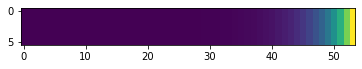

In [7]:
plt.imshow(data.pressure_hl)

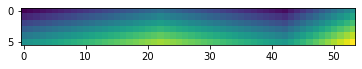

In [8]:
plt.imshow(data.temperature_hl)

In [9]:
data = h2o_data_base

pres_ref = 80000 # Pa
temp_ref = 290 # K

i_pres = np.where(data.pressure_hl[0] <= pres_ref)[0][-1]
i_temp = np.where(data.temperature_hl[:,i_pres] <= temp_ref)[0][-1]

wn = data.wavenumber
wv_tau_window = data.optical_depth[i_temp,i_pres].sel(wavenumber=slice(150,1450))


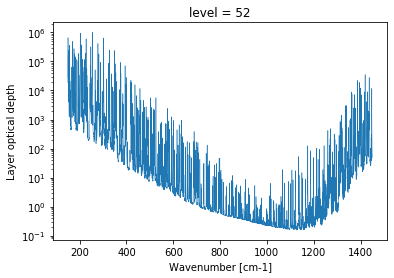

In [116]:

fig,ax = plt.subplots()
ax.plot(wn,wv_tau_window)


wv_tau_window.plot.line(linewidth=0.5)
plt.yscale('log')

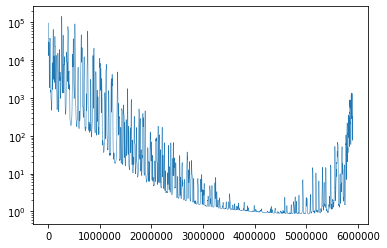

In [117]:
plt.plot(wv_tau_window.rolling(wavenumber=10000, center=True).mean(),linewidth=0.5) # Every 2 cm-1
plt.yscale('log')

In [118]:
data = h2o_data_nocont

i_pres = np.where(data.pressure_hl[0] <= pres_ref)[0][-1]
i_temp = np.where(data.temperature_hl[:,i_pres] <= temp_ref)[0][-1]

wn = data.wavenumber
wv_tau_window = data.optical_depth[i_temp,i_pres].sel(wavenumber=slice(150,1450))

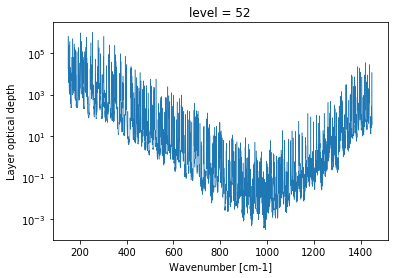

In [119]:
wv_tau_window.plot.line(linewidth=0.5)
plt.yscale('log')

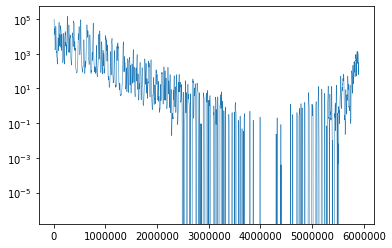

In [120]:
plt.plot(wv_tau_window.rolling(wavenumber=10000, center=True).mean(),linewidth=0.5) # Every 2 cm-1
plt.yscale('log')

In [ ]:
# NEED to interpolate in T, p to get the right (same) values with and without continuum?
# (to compare why the magnitudes don't really match, away from the window)


# extinction coefficients

Use the command (for example)

    ./ckdmip-1.0/bin/ckdmip_convert ckdmip_idealized_lw_spectra_h2o-no-continuum_constant-k.h5 ckdmip_idealized_lw_kappa_h2o-no-continuum_constant-k.h5

In [8]:
data.mole_fraction_hl

<xarray.DataArray 'mole_fraction_hl' (column: 6, half_level: 54)>
array([[0.016078, 0.016078, 0.016078, ..., 0.016078, 0.016078, 0.016078],
       [0.016078, 0.016078, 0.016078, ..., 0.016078, 0.016078, 0.016078],
       [0.016078, 0.016078, 0.016078, ..., 0.016078, 0.016078, 0.016078],
       [0.016078, 0.016078, 0.016078, ..., 0.016078, 0.016078, 0.016078],
       [0.016078, 0.016078, 0.016078, ..., 0.016078, 0.016078, 0.016078],
       [0.016078, 0.016078, 0.016078, ..., 0.016078, 0.016078, 0.016078]],
      dtype=float32)
Coordinates:
  * half_level  (half_level) int16 1 2 3 4 5 6 7 8 9 ... 47 48 49 50 51 52 53 54
Dimensions without coordinates: column
Attributes:
    long_name:      H2O mole fraction at half levels
    units:          1
    standard_name:  mole_fraction_of_water_vapor_in_air

limit_output extension: Maximum message size of 10000 exceeded with 11584 characters

In [9]:
data.keys()

KeysView(<xarray.Dataset>
Dimensions:                          (level: 53, half_level: 54, column: 6, wavenumber: 7211999)
Coordinates:
  * level                            (level) int16 1 2 3 4 5 ... 49 50 51 52 53
  * half_level                       (half_level) int16 1 2 3 4 ... 51 52 53 54
  * wavenumber                       (wavenumber) float64 0.0002 ... 3.26e+03
Dimensions without coordinates: column
Data variables:
    pressure_hl                      (column, half_level) float32 ...
    temperature_hl                   (column, half_level) float32 ...
    mole_fraction_hl                 (column, half_level) float32 0.01608 ......
    pressure_fl                      (column, level) float32 ...
    temperature_fl                   (column, level) float32 ...
    mole_fraction_fl                 (column, level) float32 ...
    reference_surface_mole_fraction  float32 ...
    optical_depth                    (column, level, wavenumber) float32 ...
Attributes: (12/14)
    title

In [10]:
# DO IT MANUALLY
def convert2kappa(i_pres,i_temp,data):
    
    M_d = 0.02897 # kg/mol
    g = 9.81
    
    tau = data.optical_depth[i_temp,i_pres]
    mole_fraction_i = data.mole_fraction_hl[i_temp,i_pres]
    pres_plus = data.pressure_hl[i_temp,i_pres]
    pres_minus = data.pressure_hl[i_temp,i_pres-1]
    
    kappa_i = g*M_d*tau / (mole_fraction_i*(pres_plus-pres_minus))
    
    return kappa_i

In [11]:
data = h2o_data_nocont

i_pres = np.where(data.pressure_fl[0] <= pres_ref)[0][-1]
i_temp = np.where(data.temperature_fl[:,i_pres] <= temp_ref)[0][-1]
temp_ref = data.temperature_fl[i_temp,i_pres]
pres_ref = data.pressure_fl[0][i_pres]
print(pres_ref,temp_ref)

kappa_h2o = convert2kappa(i_pres,i_temp,data)

<xarray.DataArray 'pressure_fl' ()>
array(69405.305, dtype=float32)
Coordinates:
    level    int16 51
Attributes:
    long_name:      Layer-mean pressure
    units:          Pa
    standard_name:  air_pressure <xarray.DataArray 'temperature_fl' ()>
array(275.88715, dtype=float32)
Coordinates:
    level    int16 51
Attributes:
    long_name:      Layer-mean temperature
    units:          K
    standard_name:  air_temperature


In [12]:
kappa_h2o_range = kappa_h2o.sel(wavenumber=slice(150,1450))
wn_range = data.wavenumber.sel(wavenumber=slice(150,1450))

In [13]:
'kappa_h20_no_continuum_%3.0fhPa_%3.0fK.pdf'%(pres_ref/100,temp_ref)

'kappa_h20_no_continuum_694hPa_276K.pdf'

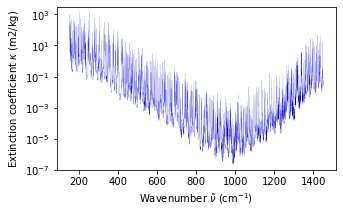

In [17]:
fig,ax = plt.subplots(ncols=1,figsize=(5,3))

ax.plot(wn_range,kappa_h2o_range,linewidth=0.1,c='mediumblue')

ax.set_yscale('log')
ax.set_ylabel(r'Extinction coefficient $\kappa$ (m2/kg)')
ax.set_xlabel(r'Wavenumber $\tilde{\nu}$ (cm$^{-1}$)')

ax.set_ylim((1e-7,3e3))

plt.savefig(os.path.join(figdir,scriptsubdir,'kappa_h2o_no_continuum_%3.0fhPa_%3.0fK.pdf'%(pres_ref/100,temp_ref)),bbox_inches='tight')


# with CO2

In [162]:
co2_base   = 'ckdmip_idealized_lw_spectra_co2_constant'

hdf5file = os.path.join(dataDir,'{}.h5'.format(co2_base))
co2_data = xr.open_dataset(hdf5file, engine='h5netcdf')

In [163]:
data = co2_data

i_pres = np.where(data.pressure_fl[0] <= pres_ref)[0][-1]
i_temp = np.where(data.temperature_fl[:,i_pres] <= temp_ref)[0][-1]
print(data.pressure_fl[0][i_pres],data.temperature_fl[i_temp,i_pres] )

kappa_co2 = convert2kappa(i_pres,i_temp,data)

<xarray.DataArray 'pressure_fl' ()>
array(69405.305, dtype=float32)
Coordinates:
    level    int16 51
Attributes:
    long_name:      Layer-mean pressure
    units:          Pa
    standard_name:  air_pressure <xarray.DataArray 'temperature_fl' ()>
array(275.88715, dtype=float32)
Coordinates:
    level    int16 51
Attributes:
    long_name:      Layer-mean temperature
    units:          K
    standard_name:  air_temperature


In [164]:
kappa_co2_range = kappa_co2.sel(wavenumber=slice(150,1450))
wn_range = data.wavenumber.sel(wavenumber=slice(150,1450))

TypeError: savefig() missing 1 required positional argument: 'fname'

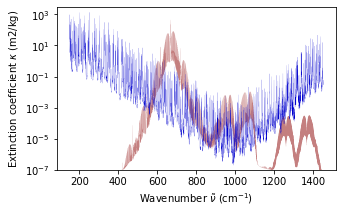

In [173]:
fig,ax = plt.subplots(ncols=1,figsize=(5,3))

# CO2
ax.plot(wn_range,kappa_co2_range,linewidth=0.1,c='darkred',alpha=0.5)

# H2O
ax.plot(wn_range,kappa_h2o_range,linewidth=0.1,c='mediumblue')

ax.set_yscale('log')
ax.set_ylabel(r'Extinction coefficient $\kappa$ (m2/kg)')
ax.set_xlabel(r'Wavenumber $\tilde{\nu}$ (cm$^{-1}$)')

ax.set_ylim((1e-7,3e3))

plt.savefig()

## Interpolate to find extinction coefficients at the reference T, p

In [11]:
data = h2o_data_nocont

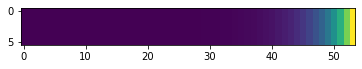

In [12]:
plt.imshow(data.pressure_hl)

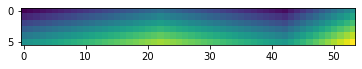

In [13]:
plt.imshow(data.temperature_hl)

In [57]:
# look for where they are, approximately

pres_ref = 80000 # Pa
temp_ref = 290 # K

i_pres = np.where(data.pressure_fl[0] <= pres_ref)[0][-1]
i_temp = np.where(data.temperature_fl[:,i_pres] <= temp_ref)[0][-1]

pres_ref_approx = data.pressure_fl[0][i_pres]
temp_ref_approx = data.temperature_fl[i_temp][i_pres]

print('size array',data.pressure_fl.shape)
print('reference pressure:',i_pres,pres_ref_approx)
print('reference temperature:',i_temp,temp_ref_approx)

size array (6, 53)
reference pressure: 50 <xarray.DataArray 'pressure_fl' ()>
array(69405.305, dtype=float32)
Coordinates:
    level    int16 51
Attributes:
    long_name:      Layer-mean pressure
    units:          Pa
    standard_name:  air_pressure
reference temperature: 3 <xarray.DataArray 'temperature_fl' ()>
array(275.88715, dtype=float32)
Coordinates:
    level    int16 51
Attributes:
    long_name:      Layer-mean temperature
    units:          K
    standard_name:  air_temperature


In [37]:
# extract values +-2 data points of index selected

slice_temp = slice(i_temp-2,i_temp+3)
slice_pres = slice(i_pres-2,i_pres+3)
slice_pres_m1 = slice(i_pres-3,i_pres+2)

pres_small = data.pressure_fl[slice_temp,slice_pres]
temp_small = data.temperature_fl[slice_temp,slice_pres]

print(pres_small)
print(temp_small)

<xarray.DataArray 'pressure_fl' (column: 5, level: 5)>
array([[ 43791.79 ,  55130.594,  69405.305,  87376.11 , 110000.   ],
       [ 43791.79 ,  55130.594,  69405.305,  87376.11 , 110000.   ],
       [ 43791.79 ,  55130.594,  69405.305,  87376.11 , 110000.   ],
       [ 43791.79 ,  55130.594,  69405.305,  87376.11 , 110000.   ],
       [ 43791.79 ,  55130.594,  69405.305,  87376.11 , 110000.   ]],
      dtype=float32)
Coordinates:
  * level    (level) int16 49 50 51 52 53
Dimensions without coordinates: column
Attributes:
    long_name:      Layer-mean pressure
    units:          Pa
    standard_name:  air_pressure
<xarray.DataArray 'temperature_fl' (column: 5, level: 5)>
array([[218.88715, 227.38715, 235.88715, 244.38715, 252.88715],
       [238.88715, 247.38715, 255.88715, 264.38715, 272.88715],
       [258.88715, 267.38715, 275.88715, 284.38715, 292.88715],
       [278.88715, 287.38715, 295.88715, 304.38715, 312.88715],
       [298.88715, 307.38715, 315.88715, 324.38715, 332.88715]

In [72]:
# Take the whold matrix and get the whole matrix for 
def convert2kappa(data,s_temp,s_pres,s_pres_m1):
    
    M_d = 0.02897 # kg/mol
    g = 9.81
    
    tau = data.optical_depth[s_temp,s_pres]
    N_nu = tau.shape[-1]
    mole_fraction = np.repeat(np.expand_dims(data.mole_fraction_hl[s_temp,s_pres],axis=2),N_nu,axis=2)
    pres_plus = np.repeat(np.expand_dims(data.pressure_hl[s_temp,s_pres],axis=2),N_nu,axis=2)
    pres_minus = np.repeat(np.expand_dims(data.pressure_hl[s_temp,s_pres_m1],axis=2),N_nu,axis=2)
    
#     print(tau.shape,mole_fraction.shape,pres_plus.shape,pres_minus.shape)
    
    kappa = g*M_d*tau / (mole_fraction*(pres_plus-pres_minus))
    
    return kappa

In [55]:
kappa = convert2kappa(data,slice_temp,slice_pres,slice_pres_m1)
print(kappa.shape)

(5, 5, 7211999)


In [111]:
# interpolate along axis

from scipy.interpolate import interp1d

def interpolateKappa(temp_ref,pres_ref):

    pres_small_1d = pres_small[0]

    # first interpolate kappa on pressure, for each nu and temp
    f_interp_kappa_on_pres = interp1d(pres_small_1d,kappa,axis=1)
    kappa_interp_on_pres = f_interp_kappa_on_pres(pres_ref)
    print(kappa_interp_on_pres.shape)

    # do the same for temperature
    f_interp_temp_on_pres = interp1d(pres_small_1d,temp_small,axis=1)
    temp_small_interp_on_pres = f_interp_temp_on_pres(pres_ref)
    print(temp_small_interp_on_pres.shape)

    # use the interpolated kappa and interpolated temp, to interpolate one onto the other and get the final kappa array
    f_interp_kappa_on_temp = interp1d(temp_small_interp_on_pres,kappa_interp_on_pres,axis=0)
    kappa_interp_on_pres_temp = f_interp_kappa_on_temp(temp_ref)
    print(kappa_interp_on_pres_temp.shape)

    return kappa_interp_on_pres_temp

kappa_interp_290_800 = interpolateKappa(290,80000)
kappa_interp_260_500 = interpolateKappa(260,50000)
# kappa_interp_260_500 = kappa[1,1]

(5, 7211999)
(5,)
(7211999,)
(5, 7211999)
(5,)
(7211999,)


In [124]:
# select wavenumber range

# wn_min = 150 # cm-1
wn_min = 200 # cm-1
wn_max = 1450 # cm-1

i_min = np.where(data.wavenumber >= wn_min)[0][0]
i_max = np.where(data.wavenumber >= wn_max)[0][0]

print('indices')
print(i_min,i_max)

slice_wn = slice(i_min,i_max)


# kappa_h2o_interp_pres_temp_range = kappa_interp_on_pres_temp[slice_wn]
kappa_interp_290_800_range = kappa_interp_290_800[slice_wn]
kappa_interp_260_500_range = kappa_interp_260_500[slice_wn]

wn_range = data.wavenumber[slice_wn]


indices
999999 6650000


(1e-07, 3000.0)

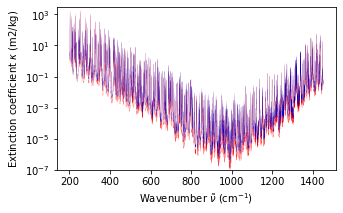

In [125]:
fig,ax = plt.subplots(ncols=1,figsize=(5,3))

ax.plot(wn_range,kappa_interp_260_500_range,linewidth=0.1,c='r')
ax.plot(wn_range,kappa_interp_290_800_range,linewidth=0.1,c='mediumblue')

ax.set_yscale('log')
ax.set_ylabel(r'Extinction coefficient $\kappa$ (m2/kg)')
ax.set_xlabel(r'Wavenumber $\tilde{\nu}$ (cm$^{-1}$)')

ax.set_ylim((1e-7,3e3))

# plt.savefig(os.path.join(figdir,scriptsubdir,'kappa_h2o_no_continuum_%3.0fhPa_%3.0fK.pdf'%(pres_ref/100,temp_ref)),bbox_inches='tight')


In [130]:
# linear interpolation of the rotational branch

from scipy.stats import linregress

i_max_rot = np.where(wn_range >= 1000)[0][0]
slice_fit = slice(0,i_max_rot)

# fix nu_rot = 150 cm-1
# nu_rot = 150
nu_rot = 200

def fitRot(kappa):

    slope, intercept, r, p, se = linregress(wn_range[slice_fit]-nu_rot,np.log(kappa[slice_fit]))
    l_rot = -1/slope
    kappa_rot = np.exp(intercept)
    print(l_rot,kappa_rot)
    print(slice_fit)
    kappa_fit = kappa_rot * np.exp(-(wn_range[slice_fit]-nu_rot)/l_rot)
    
    return kappa_rot,l_rot,kappa_fit

kappa_rot_260_500,l_rot_260_500,kappa_fit_260_500 = fitRot(kappa_interp_260_500_range)
kappa_rot_290_800,l_rot_290_800,kappa_fit_290_800 = fitRot(kappa_interp_290_800_range)

56.120208952819716 1.4548732528765629
slice(0, 4000001, None)
59.17996764283727 2.3667290204329836
slice(0, 4000001, None)


(1e-07, 3000.0)

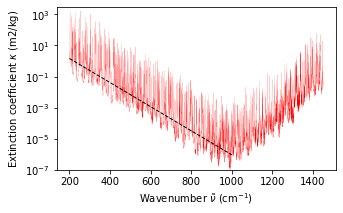

In [131]:
fig,ax = plt.subplots(ncols=1,figsize=(5,3))

ax.plot(wn_range,kappa_interp_260_500_range,linewidth=0.1,c='r')
ax.plot(wn_range[slice_fit],kappa_fit_260_500,linewidth=1,c='k',linestyle='--',)

ax.set_yscale('log')
ax.set_ylabel(r'Extinction coefficient $\kappa$ (m2/kg)')
ax.set_xlabel(r'Wavenumber $\tilde{\nu}$ (cm$^{-1}$)')

ax.set_ylim((1e-7,3e3))

# plt.savefig(os.path.join(figdir,scriptsubdir,'kappa_h2o_no_continuum_%3.0fhPa_%3.0fK.pdf'%(pres_ref/100,temp_ref)),bbox_inches='tight')


The fitted coefficients are similar for $l_{rot} ~ 56$ cm-1 for JF2020 reference values, but the $\kappa_{rot}$ coefficients are much lower, and it seems that this is due to the spectral resolution used when calculating the fit. The final values retained  for (290K,800hPa) are :

$$\kappa_{rot} = 2.36 m2/kg$$
$$l_{rot} = 59.2 cm-1 $$ 